<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1">Setup</a></span></li><li><span><a href="#Plotting-Context" data-toc-modified-id="Plotting-Context-2">Plotting Context</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-3">Load Data</a></span></li><li><span><a href="#Basic-Analyses" data-toc-modified-id="Basic-Analyses-4">Basic Analyses</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Model-Cross-Validated-Accuracy-(Specify-Model-by-Name)" data-toc-modified-id="Model-Cross-Validated-Accuracy-(Specify-Model-by-Name)-4.0.1">Model Cross Validated Accuracy (Specify Model by Name)</a></span></li><li><span><a href="#No-Brainer-Perf" data-toc-modified-id="No-Brainer-Perf-4.0.2">No Brainer Perf</a></span></li><li><span><a href="#Number-of-Trials" data-toc-modified-id="Number-of-Trials-4.0.3">Number of Trials</a></span></li><li><span><a href="#AA1" data-toc-modified-id="AA1-4.0.4">AA1</a></span></li><li><span><a href="#Model-Free-Plotting-of-Choices-Based-on-Prob-Diff-and-proportion-revealed" data-toc-modified-id="Model-Free-Plotting-of-Choices-Based-on-Prob-Diff-and-proportion-revealed-4.0.5">Model Free Plotting of Choices Based on Prob Diff and proportion revealed</a></span></li><li><span><a href="#All-subjects" data-toc-modified-id="All-subjects-4.0.6">All subjects</a></span></li><li><span><a href="#High-Anxious" data-toc-modified-id="High-Anxious-4.0.7">High Anxious</a></span></li><li><span><a href="#Low-Anxious" data-toc-modified-id="Low-Anxious-4.0.8">Low Anxious</a></span></li></ul></li><li><span><a href="#Single-Model-Plots" data-toc-modified-id="Single-Model-Plots-4.1">Single Model Plots</a></span><ul class="toc-item"><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-4.1.1">Bar plots</a></span></li><li><span><a href="#Load-data-again-and-Create-Pairs" data-toc-modified-id="Load-data-again-and-Create-Pairs-4.1.2">Load data again and Create Pairs</a></span></li><li><span><a href="#Correlations-of-Parameters-Scatter" data-toc-modified-id="Correlations-of-Parameters-Scatter-4.1.3">Correlations of Parameters Scatter</a></span></li><li><span><a href="#Correlation-of-Parameter-Tables" data-toc-modified-id="Correlation-of-Parameter-Tables-4.1.4">Correlation of Parameter Tables</a></span></li><li><span><a href="#Plotting-intercept-and-slope-split-model" data-toc-modified-id="Plotting-intercept-and-slope-split-model-4.1.5">Plotting intercept and slope split model</a></span></li><li><span><a href="#Split-Model----Mixed-Effects-and-T-tests-on-Model-Params" data-toc-modified-id="Split-Model----Mixed-Effects-and-T-tests-on-Model-Params-4.1.6">Split Model -  Mixed Effects and T-tests on Model Params</a></span></li><li><span><a href="#Anova-and-T-tests-on-Model-Params" data-toc-modified-id="Anova-and-T-tests-on-Model-Params-4.1.7">Anova and T-tests on Model Params</a></span></li><li><span><a href="#Scatters-with-STAI" data-toc-modified-id="Scatters-with-STAI-4.1.8">Scatters with STAI</a></span></li><li><span><a href="#Scatters-with-traits" data-toc-modified-id="Scatters-with-traits-4.1.9">Scatters with traits</a></span></li><li><span><a href="#Scatter-with-Traits-(one-line)" data-toc-modified-id="Scatter-with-Traits-(one-line)-4.1.10">Scatter with Traits (one line)</a></span></li></ul></li></ul></li></ul></div>

# Setup 
- using py27 env

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import pickle
import scipy
import statsmodels.api as sm
import os
%matplotlib inline

/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import sys
sys.path.append("/home/bishop/studies/Online/analysis_ambi/analysis/scripts/")
import Scripts_Data_Processing
reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *


# Plotting Context

In [124]:
sns.set(rc={'image.cmap': 'cubehelix'})
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")
sns.set_context('talk')
sns.set_style('white',{'figure.facecolor':'white'})

# Load Data 

In [4]:

# LOAD DATA 
data_participants = pd.read_csv('../results/sub_table.csv')
data_participants = data_participants.loc[
    ~np.isnan(data_participants.num_no_resp_combined)&
    ((data_participants.date=='2017-04-17')|(data_participants.date=='2017-03-06'))|(data_participants.date=='2017-06-14')]
datasetfolder='datasetb'


data_participants.head()


,MID,AID,date,ASIR,BDI,CESD,EPQ,IUS,IUS1,IUS2,...,endtime_PSWQ,duration_ASIR,starttime_ASIR,endtime_ASIR,duration_IUS,starttime_IUS,endtime_IUS,duration_ambi combined,starttime_ambi combined,endtime_ambi combined
0,A0017268R9SKD8U2Y3F,33LK57MYLUA9QA3R3JQA60A1P97ZST,2017-04-17,28.0,1.0,5.0,15.0,87.0,37.0,50.0,...,1.492550e+09,99.0,1.492551e+09,1.492551e+09,84.0,1.492550e+09,1.492550e+09,2725.0,1.492551e+09,1.492553e+09
1,A12HZGOZQD5YK7,3QRYMNZ7FZMGOL2NPVK6LIZEHEGNTS,2017-04-17,58.0,11.0,19.0,16.0,93.0,47.0,46.0,...,1.492524e+09,258.0,1.492524e+09,1.492524e+09,409.0,1.492523e+09,1.492523e+09,3373.0,1.492524e+09,1.492528e+09
2,A12K9210P1R1DN,34YB12FSQZT61YVHTU6Z9KVPMT9MGR,2017-04-17,25.0,7.0,4.0,8.0,42.0,20.0,22.0,...,1.492492e+09,124.0,1.492492e+09,1.492492e+09,183.0,1.492491e+09,1.492491e+09,5177.0,1.492492e+09,1.492497e+09
3,A14ADQ7RUN6TDY,3DUZQ9U6SNTSHQYH2M17LUX51XBVSX,2017-04-17,10.0,3.0,6.0,3.0,34.0,18.0,16.0,...,1.492487e+09,193.0,1.492487e+09,1.492487e+09,162.0,1.492487e+09,1.492487e+09,6848.0,1.492487e+09,1.492494e+09
4,A14TOBAPF6MMB5,30LB5CDZNDF9P1JFUH7QWU4IUHT0ZC,2017-04-17,30.0,15.0,22.0,12.0,44.0,23.0,21.0,...,1.492525e+09,311.0,1.492526e+09,1.492526e+09,303.0,1.492524e+09,1.492524e+09,3149.0,1.492526e+09,1.492529e+09


In [5]:
len(data_participants.MID.unique())

189

In [6]:
test = remove_bad_participants(data_participants,task='combined')
len(test.MID.unique())

Scripts_Data_Processing.py:287: RuntimeWarning: invalid value encountered in greater
  selector = (nbperf_g>0.6)&(nbperf_l>0.6)&(timeouts<10)&(numtrials>280)&(MID!='A2KG59JUICJLP0') #has good no brainer perf but <0.5 model fit? Only subject so excluding rather than figuring out why.
Scripts_Data_Processing.py:287: RuntimeWarning: invalid value encountered in less
  selector = (nbperf_g>0.6)&(nbperf_l>0.6)&(timeouts<10)&(numtrials>280)&(MID!='A2KG59JUICJLP0') #has good no brainer perf but <0.5 model fit? Only subject so excluding rather than figuring out why.


153

In [7]:
# # strip old models out 
# for col in data_participants.columns:
#     if 'model_' in col or 'flexible' in col:
#         data_participants.drop(col,axis=1,inplace=True)

In [8]:
data_participants.columns.values

array(['MID', 'AID', 'date', 'ASIR', 'BDI', 'CESD', 'EPQ', 'IUS', 'IUS1',
       'IUS2', 'MASQ.AA', 'MASQ.AD', 'MASQ.MS', 'MASQ.DS', 'MASQ.AS',
       'PSWQ', 'STAI_State', 'STAI_Trait', 'STAI_Trait_anx',
       'STAI_Trait_dep', 'CameBackTwice', 'ntrials_loss',
       'ntrials_resp_loss', 'mean_RT_loss', 'num_no_resp_loss',
       'totalptsloss', 'startingptsloss', 'ntrials_gain',
       'ntrials_resp_gain', 'mean_RT_gain', 'num_no_resp_gain',
       'totalptsgain', 'startingptsgain', 'ntrials_combined',
       'ntrials_resp_combined', 'mean_RT_combined', 'num_no_resp_combined',
       'totalptscombined', 'startingptscombined', 'RPP', 'tasks',
       'progress_times', 'task_order', 'no_brainer_per_cor_gain',
       'no_brainer_per_cor_loss', 'no_brainer_n_gain', 'no_brainer_n_loss',
       'duration_STAI_State', 'starttime_STAI_State', 'endtime_STAI_State',
       'duration_STAI_Trait', 'starttime_STAI_Trait', 'endtime_STAI_Trait',
       'duration_BDI', 'starttime_BDI', 'endtime_BDI'

In [9]:
task = 'combined'
param_sets_split={}
param_sets_split['0'] = ['mag_diff','prob_diff']
param_sets_split['1'] = ['mag_diff','prob_diff','sqrt_prop_revealed']


In [10]:
# adding umambiguous models
results_folder = '../results/log_reg_model_results/individual_subjects/'
resultnames = ['bic','aic','pseudoR2','pred_acc']


for split in ['ambig_gain','ambig_loss','unambig_gain','unambig_loss']:
    if 'unambig' in split:
        paramnum='0'
    else:
        paramnum='1'
        
    modelname = 'model_split_'+split+'_'.join(param_sets_split[paramnum])
    files = glob.glob(results_folder+'*'+modelname+'.p')
    for filee in files:
        model_results = pickle.load(open(filee,'rb'))
        MID = str(model_results['MID'])
        task = get_gain_loss_from_filename(filee)
        params = model_results['params']

        for result in resultnames:
            data_participants.loc[(data_participants.MID==MID) & 
                              (data_participants.date==str(get_date_from_filename(filee))),
                               modelname+'_'+result+'_'+task]=model_results[result]
        for param in params.index:
#             if param=='intercept':
#                 paramname = param+'_'+split
#             else:
            paramname=param
            data_participants.loc[(data_participants.MID==MID) & 
                              (data_participants.date==str(get_date_from_filename(filee))),
                               modelname+'_'+paramname+'_'+task]=params[param]

        

In [11]:
data_participants.head()

,MID,AID,date,ASIR,BDI,CESD,EPQ,IUS,IUS1,IUS2,...,model_split_unambig_gainmag_diff_prob_diff_intercept_combined,model_split_unambig_gainmag_diff_prob_diff_mag_diff_rl_gain_combined,model_split_unambig_gainmag_diff_prob_diff_prob_diff_rl_gain_combined,model_split_unambig_lossmag_diff_prob_diff_bic_combined,model_split_unambig_lossmag_diff_prob_diff_aic_combined,model_split_unambig_lossmag_diff_prob_diff_pseudoR2_combined,model_split_unambig_lossmag_diff_prob_diff_pred_acc_combined,model_split_unambig_lossmag_diff_prob_diff_intercept_combined,model_split_unambig_lossmag_diff_prob_diff_mag_diff_rl_loss_combined,model_split_unambig_lossmag_diff_prob_diff_prob_diff_rl_loss_combined
0,A0017268R9SKD8U2Y3F,33LK57MYLUA9QA3R3JQA60A1P97ZST,2017-04-17,28.0,1.0,5.0,15.0,87.0,37.0,50.0,...,0.129622,1.494146,-0.110532,57.993755,51.205715,0.535317,0.915493,-0.398952,5.499229,-0.711681
1,A12HZGOZQD5YK7,3QRYMNZ7FZMGOL2NPVK6LIZEHEGNTS,2017-04-17,58.0,11.0,19.0,16.0,93.0,47.0,46.0,...,-0.383982,1.109292,1.717370,81.453512,74.665472,0.297437,0.774648,0.347702,1.457230,-2.334810
2,A12K9210P1R1DN,34YB12FSQZT61YVHTU6Z9KVPMT9MGR,2017-04-17,25.0,7.0,4.0,8.0,42.0,20.0,22.0,...,-1.457023,0.359548,2.817187,59.332425,52.673902,0.478189,0.838235,1.287112,2.586713,-3.992592
3,A14ADQ7RUN6TDY,3DUZQ9U6SNTSHQYH2M17LUX51XBVSX,2017-04-17,10.0,3.0,6.0,3.0,34.0,18.0,16.0,...,-0.816612,0.342660,1.461803,73.007696,66.219657,0.346304,0.746479,1.060577,1.440244,-2.658139
4,A14TOBAPF6MMB5,30LB5CDZNDF9P1JFUH7QWU4IUHT0ZC,2017-04-17,30.0,15.0,22.0,12.0,44.0,23.0,21.0,...,-0.024660,1.902493,0.626927,78.279764,71.491725,0.322844,0.873239,0.533472,0.270456,-2.141312


In [12]:
split='ambig_gain'
modelname = 'model_split_'+split+'_'.join(param_sets_split['1'])
df_ambig_gain=get_params_df(modelname,task,data_participants,combined=True)
df_ambig_gain.parameter.replace({'intercept':'intercept_ambig_gain'},inplace=True)

split='ambig_loss'
modelname = 'model_split_'+split+'_'.join(param_sets_split['1'])
df_ambig_loss=get_params_df(modelname,task,data_participants,combined=True)
df_ambig_loss.parameter.replace({'intercept':'intercept_ambig_loss'},inplace=True)

['intercept', 'mag_diff_amb_gain', 'prob_diff_amb_gain', 'sqrt_prop_revealed_gain']
['intercept', 'mag_diff_amb_loss', 'prob_diff_amb_loss', 'sqrt_prop_revealed_loss']


In [13]:
split='unambig_gain'
modelname = 'model_split_'+split+'_'.join(param_sets_split['0'])
print(modelname)
df_unambig_gain=get_params_df(modelname,task,data_participants,combined=True)
df_unambig_gain.parameter.replace({'intercept':'intercept_unambig_gain'},inplace=True)

split='unambig_loss'
modelname = 'model_split_'+split+'_'.join(param_sets_split['0'])
df_unambig_loss=get_params_df(modelname,task,data_participants,combined=True)
df_unambig_loss.parameter.replace({'intercept':'intercept_unambig_loss'},inplace=True)

model_split_unambig_gainmag_diff_prob_diff
['intercept', 'mag_diff_rl_gain', 'prob_diff_rl_gain']
['intercept', 'mag_diff_rl_loss', 'prob_diff_rl_loss']


In [14]:
df = pd.concat((df_ambig_gain,df_ambig_loss,df_unambig_gain,df_unambig_loss))

In [15]:
df.parameter.unique()

array(['intercept_ambig_gain', 'mag_diff_amb_gain', 'prob_diff_amb_gain',
       'sqrt_prop_revealed_gain', 'intercept_ambig_loss',
       'mag_diff_amb_loss', 'prob_diff_amb_loss',
       'sqrt_prop_revealed_loss', 'intercept_unambig_gain',
       'mag_diff_rl_gain', 'prob_diff_rl_gain', 'intercept_unambig_loss',
       'mag_diff_rl_loss', 'prob_diff_rl_loss'], dtype=object)

In [16]:
# Remove Empty Subjects 
print(len(df.MID.unique()))
df = df.loc[~np.isnan(df['beta']),:] # remove Nan's
print(len(df.MID.unique()))

# Remove Bad subjects 
print('removing bad subjects')
df=remove_bad_participants(df,task)
print(len(df.MID.unique()))
df.head()

189
185
removing bad subjects
152


,BDI,CameBackTwice,MASQ.AA,MASQ.AD,MID,PSWQ,STAI_Trait,STAI_Trait_dep,beta,date,...,model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_pred_acc_combined,model_split_unambig_gainmag_diff_prob_diff_pred_acc_combined,model_split_unambig_lossmag_diff_prob_diff_pred_acc_combined,no_brainer_per_cor_gain,no_brainer_per_cor_loss,ntrials_combined,num_no_resp_combined,outcome type,parameter,task
0,1.0,NaN,20.0,44.0,A0017268R9SKD8U2Y3F,78.0,42.0,22.0,-0.996495,2017-04-17,...,NaN,NaN,NaN,0.882353,1.000000,300.0,0.0,shared,intercept_ambig_gain,combined
1,11.0,NaN,19.0,76.0,A12HZGOZQD5YK7,80.0,49.0,34.0,-0.436458,2017-04-17,...,NaN,NaN,NaN,1.000000,0.941176,300.0,0.0,shared,intercept_ambig_gain,combined
2,7.0,NaN,22.0,43.0,A12K9210P1R1DN,51.0,28.0,18.0,-2.110760,2017-04-17,...,NaN,NaN,NaN,0.823529,0.875000,286.0,0.0,shared,intercept_ambig_gain,combined
3,3.0,NaN,20.0,56.0,A14ADQ7RUN6TDY,36.0,37.0,28.0,-0.449556,2017-04-17,...,NaN,NaN,NaN,0.764706,0.882353,300.0,0.0,shared,intercept_ambig_gain,combined
4,15.0,NaN,29.0,79.0,A14TOBAPF6MMB5,53.0,42.0,31.0,-0.303109,2017-04-17,...,NaN,NaN,NaN,0.941176,0.882353,300.0,0.0,shared,intercept_ambig_gain,combined


# Basic Analyses

### Model Cross Validated Accuracy (Specify Model by Name)

In [30]:

# x1 = data_participants[modelname+'_pred_acc_cv_mean_combined'].as_matrix()
# #x2 = d2['model_singRL_cat_pred_acc_cv_mean_gain'].as_matrix()
# sns.set_context('paper',font_scale=1.5)
# sns.set_style('white',{'figure.facecolor':'white'})
# plt.hist(x1[~np.isnan(x1)],alpha=0.5,label='combined group')
# #plt.hist(x2[~np.isnan(x2)],alpha=0.4,label='gain group')
# plt.xlabel('cross validated pred accuracy')
# plt.ylabel('people')
# plt.legend()
# sns.despine()
# #plt.savefig('../figs/'+datasetfolder+'/pred_acc_cv_mean_combined_v_gain.png',dpi=300)

In [31]:
# # after exclusion. 
# d=remove_bad_participants(data_participants,task)
# x1 = d[modelname+'_pred_acc_cv_mean_combined'].as_matrix()
# #x2 = d2['model_singRL_cat_pred_acc_cv_mean_gain'].as_matrix()
# sns.set_context('paper',font_scale=1.5)
# sns.set_style('white',{'figure.facecolor':'white'})
# plt.hist(x1[~np.isnan(x1)],alpha=0.5,label='combined group')
# #plt.hist(x2[~np.isnan(x2)],alpha=0.4,label='gain group')
# plt.xlabel('cross validated pred accuracy')
# plt.ylabel('people')
# plt.legend()
# sns.despine()
# plt.savefig('../figs/'+datasetfolder+'/pred_acc_cv_mean_combined_v_gain'+modelname+'_after_excludsion.png',dpi=300)



### No Brainer Perf 

In [404]:
# get in person data for comparison 
in_person_df = pd.read_csv('/Users/chris/Desktop/ambi_gain_loss_shock/output/output_SfN/model_summary_gl.csv')

In [407]:
#in_person_df['']
in_person_df.head()

,Unnamed: 0,MID,nb_perf_gl,avg_rt_gl,bic_ambig_gain,aic_ambig_gain,pseudoR2_ambig_gain,pred_acc_ambig_gain,llr_pvalue_ambig_gain,bic_ambig_loss,...,bic_unambig_gain,aic_unambig_gain,pseudoR2_unambig_gain,pred_acc_unambig_gain,llr_pvalue_unambig_gain,bic_unambig_loss,aic_unambig_loss,pseudoR2_unambig_loss,pred_acc_unambig_loss,llr_pvalue_unambig_loss
0,0,6,0.841463,1776.653333,83.272790,73.845955,0.063192,0.833333,2.175596e-01,108.287600,...,104.430302,97.600304,0.081771,0.652778,0.016930,80.037410,73.207412,0.325165,0.875000,9.290179e-08
1,0,7,0.890244,2025.860000,94.828398,85.401563,0.220498,0.743590,6.860782e-05,102.639707,...,104.870361,98.040362,0.077874,0.652778,0.020519,89.051470,82.221472,0.232510,0.750000,9.678815e-06
2,0,10,0.878049,2535.876667,93.854567,84.427731,0.230306,0.743590,4.301397e-05,97.942220,...,89.961203,83.131205,0.226814,0.708333,0.000012,58.057385,51.227386,0.542800,0.819444,2.189079e-12
3,0,12,0.817073,1465.900000,90.089762,80.662927,0.200353,0.820513,3.988735e-04,81.680182,...,94.080430,87.250431,0.178645,0.736111,0.000145,69.496437,62.666439,0.429413,0.805556,5.489096e-10
4,0,13,0.804878,1803.233333,83.037043,73.610207,0.329494,0.794872,4.654352e-07,110.120138,...,85.954774,79.124775,0.267384,0.750000,0.000002,87.048494,80.218496,0.254766,0.805556,3.093582e-06


In [415]:
data_participants['nb_perf_gl']=(data_participants['no_brainer_per_cor_gain']+data_participants['no_brainer_per_cor_loss'])/2.0

data_participants['PseudoR2']=(data_participants['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_pseudoR2_combined']+data_participants['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_pseudoR2_combined'])/2.0


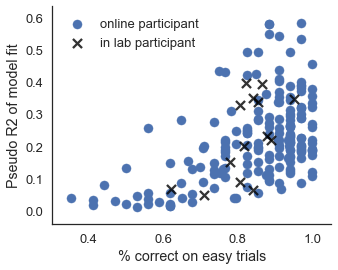

In [427]:

fig,axes =plt.subplots(1,1,figsize=(5,4))
metric1='no_brainer_per_cor_gain'
metric2='model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_pseudoR2_combined'
metric3='model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_pseudoR2_combined'

current_palette = sns.color_palette()


#axes.scatter(data_participants[metric1],data_participants[metric2],label='gain trials',c=current_palette[2])
#axes.scatter(data_participants[metric1],data_participants[metric3],label='loss trials',c=current_palette[0])

axes.scatter(data_participants['nb_perf_gl'],data_participants['PseudoR2'],label='online participant',c=current_palette[0])


metric1='nb_perf_gl'
metric2='pseudoR2_ambig_gain'
axes.scatter(in_person_df[metric1],in_person_df[metric2],label='in lab participant',c='k',alpha=0.8,marker='x')

sns.despine()
axes.set_xlabel('% correct on easy trials')
axes.set_ylabel('Pseudo R2 of model fit')
plt.legend()
plt.savefig('../figs/SfN_Poster/performance.png',dpi=300,bbox_inches='tight')


In [388]:
#trial_data

In [370]:
nb_count_cor = []
nb_count = []
nb_perf = []
for sub in range(32):
    trial_data=pd.read_csv('../../tasklogs/shock_fmri/S'+str(sub)+'.csv')
    trial_data['right_better']=(trial_data['mag_left']>trial_data['mag_right'])&(trial_data['prob_o_l']>trial_data['prob_o_r'])
    trial_data['left_better']=(trial_data['mag_left']<trial_data['mag_right'])&(trial_data['prob_o_l']<trial_data['prob_o_r'])
    trial_data['no_brainers']=(trial_data['left_better'])|(trial_data['right_better'])
    #trial_data_unambig = trial_data.loc[trial_data.num_revealed==50.0,]    
    
    trial_data['chose_better']=((trial_data.resp_r_1==0)&(trial_data.left_better==True))|((trial_data.resp_r_1==1)&(trial_data.right_better==True))

    selamb = trial_data.info_amb_sqrt==1.0
    nb_count.append(trial_data.loc[ selamb,'no_brainers'].sum())
    nb_count_cor.append(trial_data.loc[ selamb,'chose_better'].sum())

In [410]:
# trial_data.loc[selamb,['prob_o_l','prob_o_r','mag_left','mag_right','resp_r_1',
#             'info_amb_sqrt','right_better','left_better','no_brainers','chose_better']]

In [380]:
#trial_data

In [411]:
#nb_count_cor

### Number of Trials 

In [16]:
data_participants.loc[data_participants.CameBackTwice==1]

#data_participants.loc[data_participants.MID=='A1BSA7FVVJGZ15']


,AID,ASIR,ASIR_had_to_drop_rows,ASIR_unique_responses,BDI,BDI_had_to_drop_rows,BDI_unique_responses,CESD,CESD_had_to_drop_rows,CESD_unique_responses,...,model_split_unambig_gainmag_diff_prob_diff_intercept_combined,model_split_unambig_gainmag_diff_prob_diff_mag_diff_rl_gain_combined,model_split_unambig_gainmag_diff_prob_diff_prob_diff_rl_gain_combined,model_split_unambig_lossmag_diff_prob_diff_bic_combined,model_split_unambig_lossmag_diff_prob_diff_aic_combined,model_split_unambig_lossmag_diff_prob_diff_pseudoR2_combined,model_split_unambig_lossmag_diff_prob_diff_pred_acc_combined,model_split_unambig_lossmag_diff_prob_diff_intercept_combined,model_split_unambig_lossmag_diff_prob_diff_mag_diff_rl_loss_combined,model_split_unambig_lossmag_diff_prob_diff_prob_diff_rl_loss_combined


In [17]:
data_participants['CameBackTwice'].sum() # but this could be from gain/loss times as well. 

nan

In [18]:
#plt.hist(data_participants.ntrials_combined)
print(np.sum(data_participants.ntrials_combined<250))
print(np.sum(data_participants.ntrials_combined<290))

0
13


### AA1

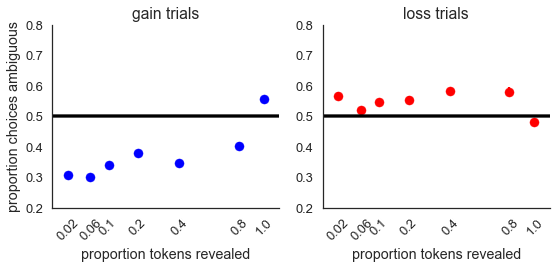

In [19]:
task='combined'
d=remove_bad_participants(data_participants,task)

fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))

levels = np.sort(np.array([ 1.        ,  0.31622777,  0.24494897,  0.4472136 ,  0.14142136,
        0.63245553,  0.89442719]))

for level in np.round(levels,2):
    
    x = level
    yg = d['aa1_prop_ambi_info_g_'+str(level)+'_combined'].as_matrix()
    axes[0].scatter(x,np.nanmean(yg),c='b')
    axes[0].errorbar(x,np.nanmean(yg),yerr=np.nanstd(yg)/np.sqrt(len(yg)),c='b')
    axes[0].axhline(y=0.5,color='k')
    axes[0].set_xlabel('proportion tokens revealed')
    #axes[0].scatter(np.ones(len(yg))*x,yg,c='g',s=2)
    #axes[0].scatter(np.ones(len(yg))*x,yg,c='g')
    yl = d['aa1_prop_ambi_info_l_'+str(level)+'_combined'].as_matrix()
    axes[1].scatter(x,np.nanmean(yl),c='r')
    axes[1].errorbar(x,np.nanmean(yl),yerr=np.nanstd(yl)/np.sqrt(len(yl)),c='r')
    axes[1].axhline(y=0.5,color='k')
    #axes[1].scatter(np.ones(len(yl))*x,yl,c='r',s=2)
    axes[1].set_xlabel('proportion tokens revealed')
    axes[0].set_ylabel('proportion choices ambiguous')
    axes[0].set_title('gain trials')
    axes[1].set_title('loss trials')
    plt.sca(axes[0])
    info_amb_levels_options = [ 0.02,  0.06,  0.1 ,  0.2 ,  0.4 ,  0.8 ,  1.  ]
    #info_amb_levels_options = info_amb_levels_options
    labels = [str(np.round(l,2)) for l in info_amb_levels_options]
    plt.xticks(levels,labels,rotation=45)
    plt.sca(axes[1])
    labels = [str(np.round(l,2)) for l in info_amb_levels_options]
    plt.xticks(levels,labels,rotation=45)
    axes[0].set_ylim([0.2,.8])
    axes[1].set_ylim([0.2,.8])
sns.despine()
plt.tight_layout()
#plt.savefig('../figs/'+datasetfolder+'/aa1_errorbars.png',dpi=300,bbox_inches='tight')

(-0.016068523661829221, 0.84371843512313416)
(0.044520852403707636, 0.58475838605338726)


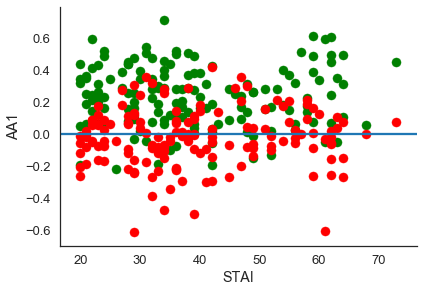

In [20]:
x=d['STAI_Trait']
y = d['aa1_aa1_g_combined']
exc = np.isnan(x)|np.isnan(y)
x = x[~exc]
y = y[~exc]
print(scipy.stats.pearsonr(x,y))
plt.scatter(x,y,color='g')

x=d['STAI_Trait']
y = d['aa1_aa1_l_combined']
exc = np.isnan(x)|np.isnan(y)
x = x[~exc]
y = y[~exc]
print(scipy.stats.pearsonr(x,y))
plt.scatter(x,y,color='r')


plt.axhline(y=0)
plt.xlabel('STAI')
plt.ylabel('AA1')
sns.despine()
#plt.savefig('../figs/'+datasetfolder+'/aa1_scatter.png',dpi=300)

### Model Free Plotting of Choices Based on Prob Diff and proportion revealed

In [32]:
df_MIDs_and_STAIs = df.groupby('MID').mean()[['STAI_Trait']]
df_MIDs_and_STAIs.head()

,STAI_Trait
MID,
A0017268R9SKD8U2Y3F,42.0
A11SV23EOGGBG3,62.0
A12HZGOZQD5YK7,49.0
A12K9210P1R1DN,28.0
A14ADQ7RUN6TDY,37.0


In [35]:
#df_MIDs_and_STAIs.index.values

In [64]:
def trial_binning(trial_table,info_amb_levels_options,prob_diff_levels,MIDi):
    
    prob_diff_levels = [[-0.8,-0.3],[-0.3,-0.01],[-0.1,0.1],[0.1,0.3],[0.3,0.8]]
    info_amb_levels_options = [[0.02,0.06],[.1,.2],[0.4,0.8],[1.0,1.0]]
    
    for iasi,ias in enumerate(info_amb_levels_options):
        for pbli,pbl in enumerate(prob_diff_levels):

            
            if ias[0]==1.0:
                
                ### Loss Ambig
                tt=trial_table.loc[(trial_table['info_amb']==1.0)&(trial_table['mag_right']<0),].copy()
                pdiff = tt['prob_o_r']-tt['prob_o_l']
                info = tt['info_amb']
                prob_chosen_l[iasi,pbli,MIDi] = np.nanmean(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'resp_r_1'])
                mr=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_right'])
                ml=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_left'])
                avg_mag_diff_l[iasi,pbli,MIDi] = np.nanmean(mr-ml)
                
                #Gain   
                tt=trial_table.loc[(trial_table['info_amb']==1.0)&(trial_table['mag_right']>0),].copy()
                pdiff = tt['prob_o_r']-tt['prob_o_l']
                info = tt['info_amb']
                prob_chosen_g[iasi,pbli,MIDi] = np.nanmean(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'resp_r_1'])
                mr=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_right'])
                ml=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_left'])
                avg_mag_diff_g[iasi,pbli,MIDi] = np.nanmean(mr-ml)

            else:
                
                ### Loss Ambig
                tt=trial_table.loc[(trial_table['info_amb']!=1.0)&(trial_table['mag_right']<0),].copy()
                pdiff = tt['prob_o_ambig_bayes']-tt['prob_o_unambig']
                info = tt['info_amb']
                prob_chosen_l[iasi,pbli,MIDi] = np.nanmean(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'resp_amb_1'])
                mr=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_ambig'])
                ml=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_unambig'])
                avg_mag_diff_l[iasi,pbli,MIDi] = np.nanmean(mr-ml)

                #Gain   
                tt=trial_table.loc[(trial_table['info_amb']!=1.0)&(trial_table['mag_right']>0),].copy()
                pdiff = tt['prob_o_ambig_bayes']-tt['prob_o_unambig']
                info = tt['info_amb']
                prob_chosen_g[iasi,pbli,MIDi] = np.nanmean(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'resp_amb_1'])
                mr=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_ambig'])
                ml=(tt.loc[(pdiff>=pbl[0])&(pdiff<=pbl[1])&(info>=ias[0])&(info<=ias[1]),'mag_unambig'])
                avg_mag_diff_g[iasi,pbli,MIDi] = np.nanmean(mr-ml)

In [65]:
info_amb_levels_options

[[0.02, 0.06], [0.1, 0.2], [0.4, 0.8], ['1.0 (unambiguous)']]

In [107]:
def plot_it(prob_chosen_g,prob_chosen_l):
    sns.set_palette(sns.color_palette("RdBu",desat=1.0,n_colors=6))
    fig,axes=plt.subplots(1,2,figsize=(8,4),sharey=True)
    sns.despine()
    n = prob_chosen_g.shape[2]
    n_pdiff = prob_chosen_g.shape[0]
    n_info = prob_chosen_g.shape[1]

    info_amb_levels_options = [[0.02,0.06],[.1,.2],[0.4,0.8],['1.0 (unambiguous)']]
    for iasi,ias in enumerate(info_amb_levels_options):
        ias=str(ias).replace('[','').replace(']','').replace(', ','-').replace("'",'')
        mean = np.nanmean(prob_chosen_g[iasi,:,:],axis=1)
        ste =  np.nanstd(prob_chosen_g[iasi,:,:],axis=1)/np.sqrt(n)
        axes[0].errorbar(np.arange(n_info),y=mean,yerr=ste,label=ias)
        axes[0].set_ylim([0.1,0.9])
        
        mean = np.nanmean(prob_chosen_l[iasi,:,:],axis=1)
        ste =  np.nanstd(prob_chosen_l[iasi,:,:],axis=1)/np.sqrt(n)
        axes[1].errorbar(np.arange(n_info),y=mean,yerr=ste,label=ias)
        axes[1].set_ylim([0.1,0.9])

    for ax,title in zip(axes,['Gain trials','Loss trials']):
        ax.set_ylabel('Proportion trials choosing \n ambiguous urn (or right urn)')
        ax.axhline(y=0.5,linestyle='--',c='k',linewidth=2.0)
        ax.axhline(y=0.25,linestyle='--',c='k',linewidth=2.0)
        ax.axhline(y=0.75,linestyle='--',c='k',linewidth=2.0)
        labels = [str(pdd).replace('[','').replace(']','').replace(', ','-').replace("'",'') for pdd in prob_diff_levels]
        plt.sca(ax)
        ax.set_title(title)
        plt.xticks(np.arange(len(prob_diff_levels)),labels,rotation=45)
        ax.set_xlabel('Probability difference \n (ambig urn - unambig urn) \n or (right urn - left urn)')

        ax.set_xlim([np.min(np.arange(len(prob_diff_levels)))-0.5,np.max(np.arange(len(prob_diff_levels)))+0.5])
    plt.sca(ax)
    plt.legend(bbox_to_anchor=(1.05, 1),loc=2,title='Information level \n(proportion of \ntokens revealed)')
    plt.tight_layout()

### All subjects 

In [71]:
MIDS = df_MIDs_and_STAIs.index.values
prob_chosen_l = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))
prob_chosen_g = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))

for MIDi,MID in enumerate(MIDS): 
    filee = glob.glob('../../tasklogs/combined/*'+MID+'*')
    if len(filee)>1:
        filee=filee[1]
    else:
        filee=filee[0]

    trial_table = get_trial_table(filee,combined=True)
    trial_binning(trial_table,info_amb_levels_options,prob_diff_levels,MIDi)
    

In [72]:
# more probabitiy diff levels. 
np.save('../results/prob_chosen_g_all_subs_SfN.npy',prob_chosen_g)
np.save('../results/prob_chosen_l_all_subs_SfN.npy',prob_chosen_l)


In [108]:
prob_chosen_g = np.load('../results/prob_chosen_g_all_subs_SfN.npy')
prob_chosen_l = np.load('../results/prob_chosen_l_all_subs_SfN.npy')

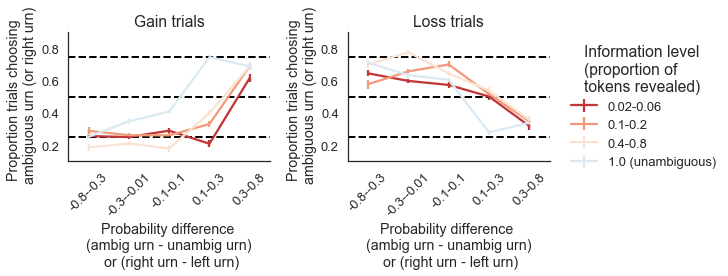

In [109]:
plot_it(prob_chosen_g,prob_chosen_l)
plt.savefig('../figs/SfN_Poster/binning.png',dpi=300,bbox_inches='tight')


### High Anxious 

In [90]:
MIDS = df_MIDs_and_STAIs.index.values[df_MIDs_and_STAIs.STAI_Trait>40]
prob_chosen_l = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))
prob_chosen_g = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))

for MIDi,MID in enumerate(MIDS): 
    filee = glob.glob('../../tasklogs/combined/*'+MID+'*')
    if len(filee)>1:
        filee=filee[1]
    else:
        filee=filee[0]

    trial_table = get_trial_table(filee,combined=True)
    trial_binning(trial_table,info_amb_levels_options,prob_diff_levels,MIDi)
    

In [91]:
# more probabitiy diff levels. 
np.save('../results/prob_chosen_g_HA_SfN.npy',prob_chosen_g)
np.save('../results/prob_chosen_l_HA_SfN.npy',prob_chosen_l)


In [110]:
prob_chosen_g = np.load('../results/prob_chosen_g_HA_SfN.npy')
prob_chosen_l = np.load('../results/prob_chosen_l_HA_SfN.npy')

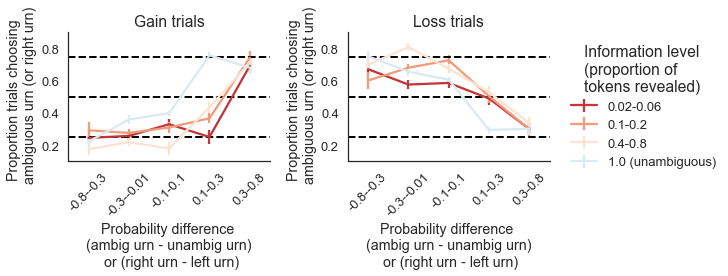

In [111]:
plot_it(prob_chosen_g,prob_chosen_l)
plt.savefig('../figs/SfN_Poster/binning_HA.png',dpi=300,bbox_inches='tight')


### Low Anxious

In [94]:
MIDS = df_MIDs_and_STAIs.index.values[df_MIDs_and_STAIs.STAI_Trait<40]
prob_chosen_l = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))
prob_chosen_g = np.zeros((len(info_amb_levels_options ),len(prob_diff_levels),len(MIDS)))

for MIDi,MID in enumerate(MIDS): 
    filee = glob.glob('../../tasklogs/combined/*'+MID+'*')
    if len(filee)>1:
        filee=filee[1]
    else:
        filee=filee[0]

    trial_table = get_trial_table(filee,combined=True)
    trial_binning(trial_table,info_amb_levels_options,prob_diff_levels,MIDi)
    

In [95]:
# more probabitiy diff levels. 
np.save('../results/prob_chosen_g_LA_SfN.npy',prob_chosen_g)
np.save('../results/prob_chosen_l_LA_SfN.npy',prob_chosen_l)


In [112]:
prob_chosen_g = np.load('../results/prob_chosen_g_LA_SfN.npy')
prob_chosen_l = np.load('../results/prob_chosen_l_LA_SfN.npy')

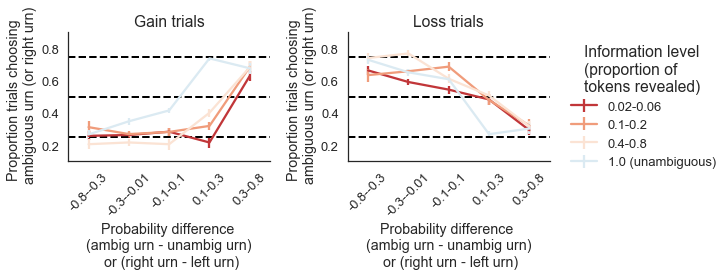

In [113]:
plot_it(prob_chosen_g,prob_chosen_l)
plt.savefig('../figs/SfN_Poster/binning_LA.png',dpi=300,bbox_inches='tight')


## Single Model Plots

### Bar plots

- requires data_participants_loaded from above

In [116]:
df.parameter.unique()

array(['intercept_ambig_gain', 'mag_diff_amb_gain', 'prob_diff_amb_gain',
       'sqrt_prop_revealed_gain', 'intercept_ambig_loss',
       'mag_diff_amb_loss', 'prob_diff_amb_loss',
       'sqrt_prop_revealed_loss', 'intercept_unambig_gain',
       'mag_diff_rl_gain', 'prob_diff_rl_gain', 'intercept_unambig_loss',
       'mag_diff_rl_loss', 'prob_diff_rl_loss'], dtype=object)

In [117]:
drops = ['intercept_unambig_gain','intercept_unambig_loss']

In [156]:
#df_for_plot2.beta.std()

outliers >10: 4


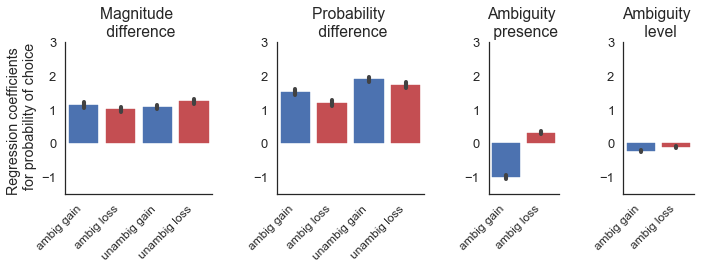

In [162]:
sns.set(rc={'image.cmap': 'cubehelix'})
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")
sns.set_context('talk')
sns.set_style('white',{'figure.facecolor':'white'})

import matplotlib.gridspec as gridspec
current_palette = sns.color_palette()

df.sort_values(by='parameter',inplace=True)
df_for_plot = df.loc[~df.parameter.isin(drops)]

# drop single outlier at beta=60
print('outliers >10: {0}'.format((df_for_plot.beta>10).sum()))
df_for_plot=df_for_plot.loc[(df_for_plot.beta<10)]



df_for_plot.loc[df_for_plot.parameter=='prob_diff_amb_loss','beta']=-1.0*df_for_plot.loc[df_for_plot.parameter=='prob_diff_amb_loss','beta']
df_for_plot.loc[df_for_plot.parameter=='prob_diff_rl_loss','beta']=-1.0*df_for_plot.loc[df_for_plot.parameter=='prob_diff_rl_loss','beta']

df_for_plot.loc[df_for_plot.parameter=='sqrt_prop_revealed_gain','beta']=-1.0*df_for_plot.loc[df_for_plot.parameter=='sqrt_prop_revealed_gain','beta']
df_for_plot.loc[df_for_plot.parameter=='sqrt_prop_revealed_loss','beta']=-1.0*df_for_plot.loc[df_for_plot.parameter=='sqrt_prop_revealed_loss','beta']


replace_dict = {}
replace_dict['mag_diff_amb_loss']='ambiguous loss trials'


names = [['mag_diff_amb_loss','mag_diff_amb_gain','mag_diff_rl_loss','mag_diff_rl_gain'],
        ['prob_diff_amb_loss','prob_diff_amb_gain','prob_diff_rl_loss','prob_diff_rl_gain'],
        ['intercept_ambig_gain','intercept_ambig_loss'],
        ['sqrt_prop_revealed_gain','sqrt_prop_revealed_loss']
        ]

xlabels2 = [['ambig gain','ambig loss','unambig gain','unambig loss'],
           ['ambig gain','ambig loss','unambig gain','unambig loss'],
          ['ambig gain','ambig loss'],
          ['ambig gain','ambig loss'],]

titles = ['Magnitude \n difference','Probability \n difference','Ambiguity \n presence','Ambiguity \n level']
plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1,70)
axes=[]
axes.append(plt.subplot(gs[0, 0:20]))
axes.append(plt.subplot(gs[0, 22:42]))
axes.append(plt.subplot(gs[0,44:56]))
axes.append(plt.subplot(gs[0,58:70]))


for ai,ax in enumerate(axes):

    df_for_plot2 = df_for_plot.loc[df_for_plot['parameter'].isin(names[ai]),]
    df_for_plot2.replace(replace_dict,inplace=True)
    plt.sca(ax)
    sns.barplot(x='parameter',y='beta',data=df_for_plot2,color=[.4,.4,.4],ci=68)
    ax.set_title(titles[ai])
    ax.set_ylim([-1.5,3])

    ax.set_xticklabels(xlabels2[ai],rotation=45,fontsize=12,ha='right')
    #ax.set_xticklabels([])
    ax.set_xlabel('')
    if ai==0:
        ax.set_ylabel('Regression coefficients \n for probability of choice')
    else:
        ax.set_ylabel('')
    # clean 
    xlabels = ax.get_xticklabels()
    for xi,xlabel in enumerate(xlabels):
        xl = xlabel.get_text()
        #print(xl)
        if 'loss' in xl and 'amb' in xl:
            ax.patches[xi].set_color(current_palette[2])
            ax.patches[xi].set_label('ambig loss trials')
        if 'loss' in xl and 'rl' in xl:
            ax.patches[xi].set_color(current_palette[2])
            ax.patches[xi].set_edgecolor('k')
            ax.patches[xi].set_hatch('////')
            ax.patches[xi].set_label('unambig loss trials')
        if 'gain' in xl and 'amb' in xl:
            ax.patches[xi].set_color(current_palette[0])
            ax.patches[xi].set_label('ambig loss trials')
        if 'gain' in xl and 'rl' in xl:
            ax.patches[xi].set_color(current_palette[0])
            ax.patches[xi].set_edgecolor('k')
            ax.patches[xi].set_hatch('////')
            ax.patches[xi].set_label('unambig gain trials')     

        if 'gain' in xl and 'sqrt' in xl:
            ax.patches[xi].set_color(current_palette[0])
            ax.patches[xi].set_label('ambig gain trials')   
        if 'loss' in xl and 'sqrt' in xl:
            ax.patches[xi].set_color(current_palette[2])
            ax.patches[xi].set_label('ambig loss trials')  
    
#     if ai==0:
#         plt.legend(bbox_to_anchor=(0.,-0.2, 4.2, 2.0), loc=4,
#            ncol=4, mode="expand", borderaxespad=0.)
plt.tight_layout()     
sns.despine()

plt.savefig('../figs/SfN_Poster/group_parameters_se_outlier_removed.png',dpi=300,bbox_inches='tight')

In [208]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind


In [219]:
# ambiguity level 

p_amb_lev_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['sqrt_prop_revealed_loss']),'beta'].as_matrix()
p_amb_lev_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['sqrt_prop_revealed_gain']),'beta'].as_matrix()

print('loss above 0:')
print(ttest_1samp(p_amb_lev_loss,0).pvalue*18)

print('gain greater than loss ')
print(ttest_ind(p_amb_lev_loss,p_amb_lev_gain).pvalue*18)

loss above 0:
0.0259752041538
gain greater than loss 
0.0852864142669


In [225]:
#ttest_1samp(p_amb_lev_loss,0).pvalue*18

In [216]:
#df_for_plot.parameter

In [220]:
# ambiguity presence

p_amb_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['intercept_ambig_gain']),'beta'].as_matrix()
p_amb_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['intercept_ambig_loss']),'beta'].as_matrix()

print('gain greater than loss ')
print(ttest_ind(p_amb_loss,p_amb_gain).pvalue*18)

gain greater than loss 
8.24582833873e-47


In [221]:
# prob
p_amb_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['prob_diff_amb_loss']),'beta'].as_matrix()
p_amb_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['prob_diff_amb_gain']),'beta'].as_matrix()
p_unamb_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['prob_diff_rl_loss']),'beta'].as_matrix()
p_unamb_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['prob_diff_rl_gain']),'beta'].as_matrix()

print(ttest_ind(p_amb_loss,p_unamb_loss).pvalue*18)
print(ttest_ind(p_amb_gain,p_unamb_gain).pvalue*18)

0.000342144056065
0.053473533421


In [222]:
# magnitudde 
m_amb_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['mag_diff_amb_loss']),'beta'].as_matrix()
m_amb_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['mag_diff_amb_gain']),'beta'].as_matrix()
m_unamb_loss = df_for_plot.loc[df_for_plot['parameter'].isin(['mag_diff_rl_loss']),'beta'].as_matrix()
m_unamb_gain = df_for_plot.loc[df_for_plot['parameter'].isin(['mag_diff_rl_gain']),'beta'].as_matrix()


from scipy.stats import ttest_ind
print(ttest_ind(m_amb_loss,m_unamb_loss).pvalue*18)
print(ttest_ind(m_amb_gain,m_unamb_gain).pvalue*18)

0.40685391056
9.37200735812


### Load data again and Create Pairs 

In [48]:

# #if using emma's model 
pairs = [['mag_diff_amb_gain','mag_diff_amb_loss'],
         ['mag_diff_rl_gain','mag_diff_rl_loss'],
        ['mag_diff_amb_gain','mag_diff_rl_gain'],
         ['mag_diff_amb_loss','mag_diff_rl_loss'],
        ['prob_diff_amb_gain','prob_diff_amb_loss'],
         ['prob_diff_rl_gain','prob_diff_rl_loss'],
        ['prob_diff_amb_gain','prob_diff_rl_gain'],
         ['prob_diff_amb_loss','prob_diff_rl_loss'],
         ['prob_diff_amb_gain','mag_diff_amb_gain'],
         ['prob_diff_amb_loss','mag_diff_amb_loss'],
         ['prob_diff_rl_gain','mag_diff_rl_gain'],
         ['prob_diff_rl_loss','mag_diff_rl_loss'],
         ['sqrt_prop_revealed_gain','sqrt_prop_revealed_loss'],
         ['intercept_ambig_loss','intercept_ambig_gain'],
         ['sqrt_prop_revealed_gain','intercept_ambig_gain'],
         ['sqrt_prop_revealed_loss','intercept_ambig_loss'],
        ]



In [50]:

# Remove Empty Subjects 
print(len(df.MID.unique()))
df = df.loc[~np.isnan(df['beta']),:] # remove Nan's
print(len(df.MID.unique()))

# regress out model fit # 
for param in df.parameter.unique():
    beta = df.loc[df.parameter==param,'beta']
    #pred_acc = df.loc[df.parameter==param,modelname+'_pred_acc_combined']
    # regress out 
    #results = sm.OLS(beta,sm.add_constant(pred_acc),missing='drop').fit()
    # put back in 
    #df.loc[df.parameter==param,'beta_resid'] = results.resid

# What is df pairs for? 
df2 = df[['mag' in p for p in df.parameter]]
df_pairs = df2[['MID','parameter','beta']].pivot_table(index='MID',columns='parameter')
df_pairs.head()
print(len(df.MID.unique()))

153
153
153


### Correlations of Parameters Scatter

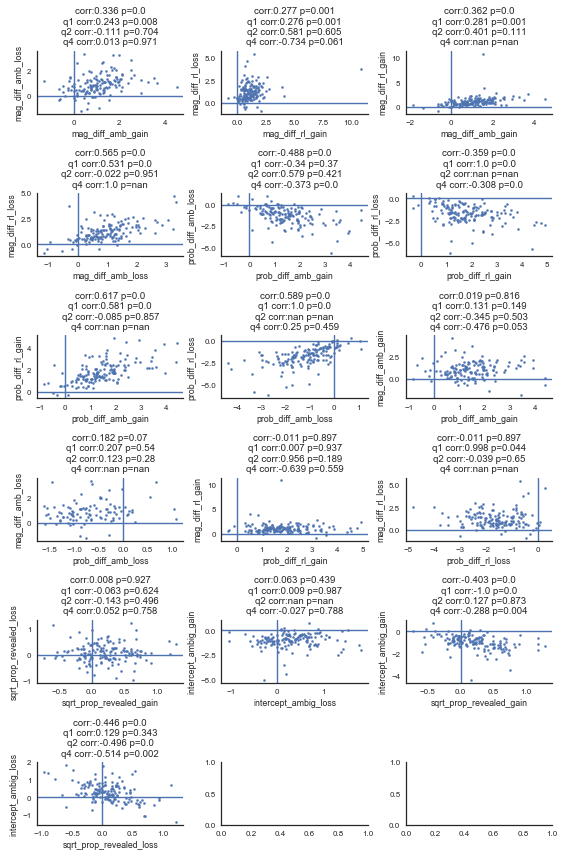

In [51]:

# residual beta's or not 
beta = 'beta'
#beta = 'beta_resid'

sns.set_style('white')
sns.set_context('paper')
fig,axes=plt.subplots(6,3,figsize=(8,12))
ax = axes.flatten()
sns.despine()


for pi,ps in enumerate(pairs):
    x1 = df.loc[(df.parameter==ps[0]) & (df.task==task),beta].as_matrix()
    x2 = df.loc[(df.parameter==ps[1]) & (df.task==task),beta].as_matrix()


    nans=np.logical_or(np.isnan(x1),np.isnan(x2))
    x1 = x1[~nans]
    x2 = x2[~nans]
    
    outliers1 = np.logical_or(x1>(np.mean(x1)+3*np.std(x1)),x1<(np.mean(x1)-3*np.std(x1)))
    outliers2 = np.logical_or(x2>(np.mean(x2)+3*np.std(x2)),x1<(np.mean(x2)-3*np.std(x2)))
    outliers = np.logical_or(outliers1,outliers2)
    x1 = x1[~outliers]
    x2 = x2[~outliers]
    
    # other_selector = np.logical_and(x1<0,x2>0)
    # x1 = x1[other_selector]
    # x2 = x2[other_selector]
    (r,p) = scipy.stats.pearsonr(x1,x2)
    #(r,p)= scipy.stats.spearmanr(x1,x2)
    #print(scipy.stats.pearsonr(x1,x2))
    #print(scipy.stats.spearmanr(x1,x2))
    ax[pi].scatter(x1,x2,s=5)
    ax[pi].axhline(y=0)
    ax[pi].axvline(x=0)
    ax[pi].set_xlabel(ps[0])
    ax[pi].set_ylabel(ps[1])
    ax[pi].set_title('corr:'+str(np.round(r,3))+' p='+str(np.round(p,3)))
    
    # select a particular quadrant
    other_selector = np.logical_and(x1>0,x2>0)
    x1b = x1[other_selector]
    x2b = x2[other_selector]
    (r2,p2) = scipy.stats.pearsonr(x1b,x2b)

    other_selector = np.logical_and(x1<0,x2>0)
    x1b = x1[other_selector]
    x2b = x2[other_selector]
    (r3,p3) = scipy.stats.pearsonr(x1b,x2b)
    other_selector = np.logical_and(x1>0,x2<0)
    x1b = x1[other_selector]
    x2b = x2[other_selector]
    (r4,p4) = scipy.stats.pearsonr(x1b,x2b)
    ax[pi].set_title('corr:'+str(np.round(r,3))+' p='+str(np.round(p,3))+'\n'+
                'q1 corr:'+str(np.round(r2,3))+' p='+str(np.round(p2,3))+'\n'+
                'q2 corr:'+str(np.round(r3,3))+' p='+str(np.round(p3,3))+'\n'+
                'q4 corr:'+str(np.round(r4,3))+' p='+str(np.round(p4,3)))
    
    
plt.tight_layout()
#plt.savefig('../figs/'+datasetfolder+'/'+modelname+'.png',dpi=300)

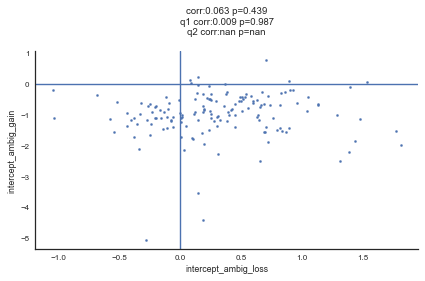

In [57]:
# Individual scatter # 

# residual beta's or not 
beta = 'beta'
#beta = 'beta_resid'
ps = pairs[13]

sns.set_style('white')
sns.set_context('paper')
fig,ax=plt.subplots(1,1,figsize=(6,4))

sns.despine()

x1 = df.loc[(df.parameter==ps[0]) & (df.task==task),beta].as_matrix()
x2 = df.loc[(df.parameter==ps[1]) & (df.task==task),beta].as_matrix()


nans=np.logical_or(np.isnan(x1),np.isnan(x2))
x1 = x1[~nans]
x2 = x2[~nans]

outliers1 = np.logical_or(x1>(np.mean(x1)+3*np.std(x1)),x1<(np.mean(x1)-3*np.std(x1)))
outliers2 = np.logical_or(x2>(np.mean(x2)+3*np.std(x2)),x1<(np.mean(x2)-3*np.std(x2)))
outliers = np.logical_or(outliers1,outliers2)
x1 = x1[~outliers]
x2 = x2[~outliers]
    
# select a particular quadrant
# other_selector = np.logical_and(x1<0,x2>0)
# x1 = x1[other_selector]
# x2 = x2[other_selector]
(r,p) = scipy.stats.pearsonr(x1,x2)

#(r,p)= scipy.stats.spearmanr(x1,x2)
#print(scipy.stats.pearsonr(x1,x2))
#print(scipy.stats.spearmanr(x1,x2))
ax.scatter(x1,x2,s=5)
ax.axhline(y=0)
ax.axvline(x=0)
ax.set_xlabel(ps[0])
ax.set_ylabel(ps[1])

# select a particular quadrant
other_selector = np.logical_and(x1>0,x2>0)
x1b = x1[other_selector]
x2b = x2[other_selector]
(r2,p2) = scipy.stats.pearsonr(x1b,x2b)

other_selector = np.logical_and(x1<0,x2>0)
x1b = x1[other_selector]
x2b = x2[other_selector]
(r3,p3) = scipy.stats.pearsonr(x1b,x2b)

ax.set_title('corr:'+str(np.round(r,3))+' p='+str(np.round(p,3))+'\n'+
            'q1 corr:'+str(np.round(r2,3))+' p='+str(np.round(p2,3))+'\n'+
            'q2 corr:'+str(np.round(r3,3))+' p='+str(np.round(p3,3))+'\n')

plt.tight_layout()
#plt.savefig('../figs/dataset2/'+modelname+'__'+'_'.join(ps)+'.png',dpi=300)

### Correlation of Parameter Tables

In [58]:
d = pd.DataFrame(columns=['pair','rvalue','pvalue'])

# whether residualized or not 
beta = 'beta'

#pairs = param
for pi,pair in enumerate(pairs):
    x1 = df.loc[df['parameter']==pair[0],beta].as_matrix()
    x2 = df.loc[df['parameter']==pair[1],beta].as_matrix()
    selector = (~np.isnan(x1))&(~np.isnan(x2))
    x1=x1[selector]
    x2=x2[selector]
    (r,p) = scipy.stats.pearsonr(x1,x2)
    d.loc[pi,'pair']=pair[0]+' // '+pair[1]
    d.loc[pi,'pvalue']=p
    d.loc[pi,'rvalue']=r    
d

,pair,rvalue,pvalue
0,mag_diff_amb_gain // mag_diff_amb_loss,0.248082,0.00198862
1,mag_diff_rl_gain // mag_diff_rl_loss,0.347013,1.11049e-05
2,mag_diff_amb_gain // mag_diff_rl_gain,0.350225,9.08417e-06
3,mag_diff_amb_loss // mag_diff_rl_loss,0.525842,2.95729e-12
4,prob_diff_amb_gain // prob_diff_amb_loss,-0.440082,1.25522e-08
5,prob_diff_rl_gain // prob_diff_rl_loss,-0.35885,5.23927e-06
6,prob_diff_amb_gain // prob_diff_rl_gain,0.560384,4.99213e-14
7,prob_diff_amb_loss // prob_diff_rl_loss,0.554075,1.08992e-13
8,prob_diff_amb_gain // mag_diff_amb_gain,0.0348595,0.66881
9,prob_diff_amb_loss // mag_diff_amb_loss,-0.0906862,0.264925


### Plotting intercept and slope split model 

In [76]:
#
#df.model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined

In [78]:
d=remove_bad_participants(data_participants,task)


In [79]:
len(d.MID.unique())

154

In [82]:
#ag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_gain_combined'].as_matrix()[sub]

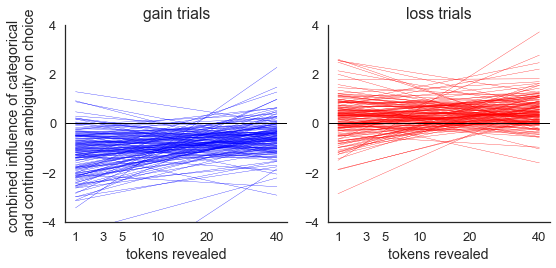

In [100]:

tokens = [1,3,5,10,20,40]
zlevels = np.array([-1.20146577, -0.7932374,  -0.51217206,  0.00432906,  0.73477196,  1.76777421])
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))
#for sub in np.random.randint(0,len(df),50):
for sub in range(len(d)):
    b1g = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_gain_combined'].as_matrix()[sub]
    b0g = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()[sub]

    b1l = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_loss_combined'].as_matrix()[sub]
    b0l = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()[sub]
    
    if b0g>0:
        c='g'
    else:
        c='r'
    c = 'b'
    axes[0].plot(zlevels,zlevels*b1g+b0g,linewidth=0.3,c=c)
    axes[0].axhline(y=0.0,c='k',linewidth=1.0)
    axes[0].set_xlabel('tokens revealed')
    plt.sca(axes[0])
    plt.xticks(zlevels,tokens)
    axes[0].set_ylabel('combined influence of categorical \n and continuous ambiguity on choice')
    axes[0].set_ylim(-4,4)
    axes[0].set_title('Gain trials')
    
    if b0l>0:
        c='g'
    else:
        c='r'
    c = 'r'
    axes[1].plot(zlevels,zlevels*b1l+b0l,linewidth=0.3,c=c)
    axes[1].axhline(y=0.0,c='k',linewidth=1.0,linestyle='-')
    plt.sca(axes[1])
    plt.xticks(zlevels,tokens)
    axes[1].set_xlabel('tokens revealed')
    axes[1].set_ylabel('')
    axes[1].set_ylim(-4,4)
    axes[1].set_title('Loss trials')
sns.despine()
plt.tight_layout()
plt.savefig('../figs/SfN_Poster/split_model_ambiguity_aversion_intercept_slope.png',dpi=300,bbox_inches='tight')# 

In [210]:
np.vstack()

array([ 0.37493422,  0.35788593,  0.34635077,  0.32562414,  0.29745225,
        0.26012679])

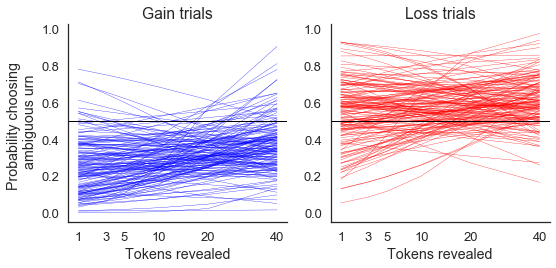

In [579]:

tokens = [1,3,5,10,20,40]
zlevels = np.array([-1.20146577, -0.7932374,  -0.51217206,  0.00432906,  0.73477196,  1.76777421])
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))
for sub in range(len(d)):
    b1g = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_gain_combined'].as_matrix()[sub]
    b0g = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()[sub]

    b1l = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_loss_combined'].as_matrix()[sub]
    b0l = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()[sub]
    
    yg = 1.0/(1+np.exp(-1.0*(zlevels*b1g+b0g)))
    yl = 1.0/(1+np.exp(-1.0*(zlevels*b1l+b0l)))
    if sub==0:
        ygs=yg
        yls=yl
    else:
        ygs=np.vstack((ygs,yg))
        yls=np.vstack((yls,yl))
    
    if b0g>0:
        c='g'
    else:
        c='r'
    c = 'b'
    axes[0].plot(zlevels,yg,linewidth=0.3,c=c)
    
    axes[0].axhline(y=0.5,c='k',linewidth=1.0)
    axes[0].set_xlabel('Tokens revealed')
    plt.sca(axes[0])
    plt.xticks(zlevels,tokens)
    axes[0].set_ylabel('Probability choosing \n ambiguous urn')
    #axes[0].set_ylim(-4,4)
    axes[0].set_title('Gain trials')
    
    if b0l>0:
        c='g'
    else:
        c='r'
    c = 'r'
    axes[1].plot(zlevels,yl,linewidth=0.3,c=c)
    axes[1].axhline(y=0.5,c='k',linewidth=1.0,linestyle='-')
    plt.sca(axes[1])
    plt.xticks(zlevels,tokens)
    axes[1].set_xlabel('Tokens revealed')
    axes[1].set_ylabel('')
    #axes[1].set_ylim(-4,4)
    axes[1].set_title('Loss trials')
    
# plot means 

#axes[0].plot(zlevels,np.nanmean(ygs,axis=0),linewidth=2,c='k')

#axes[1].plot(zlevels,np.nanmean(yls[b0ls>0],axis=0),linewidth=2,c='k')
#axes[1].plot(zlevels,np.nanmean(yls[b0ls<0],axis=0),linewidth=2,c='k')


# plot means the other way
b1gs = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_gain_combined'].as_matrix()
b0gs = d['model_split_ambig_gainmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()
yg = 1.0/(1+np.exp(-1.0*(zlevels*np.nanmean(b1gs)+np.nanmean(b0gs))))
#axes[0].plot(zlevels,yg,linewidth=2,c='k')

b1ls = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_sqrt_prop_revealed_loss_combined'].as_matrix()
b0ls = d['model_split_ambig_lossmag_diff_prob_diff_sqrt_prop_revealed_intercept_combined'].as_matrix()
yl= 1.0/(1+np.exp(-1.0*(zlevels*np.nanmean(b1ls)+np.nanmean(b0ls))))
#axes[0].plot(zlevels,yl,linewidth=2,c='k')

    
sns.despine()
plt.tight_layout()
plt.savefig('../figs/SfN_Poster/split_model_ambiguity_aversion_intercept_slope.png',dpi=300,bbox_inches='tight')# 

In [236]:
np.nanmean(b1ls[b0ls>0])

/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


0.010147903690834292

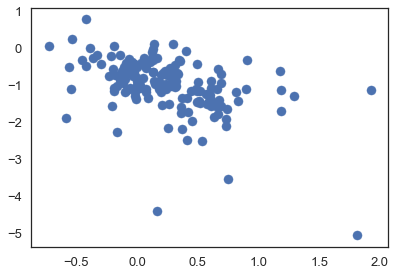

In [227]:
plt.scatter(b1gs,b0gs)

In [572]:
(b0ls>0).sum()

/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


111

In [571]:
(b0ls<0).sum()


/Users/chris/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


42

In [577]:
from scipy.stats import pearsonr
isnotnan= ~np.logical_or(np.isnan(b1ls),np.isnan(b0ls))
pearsonr(b1ls[isnotnan],b0ls[isnotnan])

(-0.41403352885397054, 1.0375564927514817e-07)

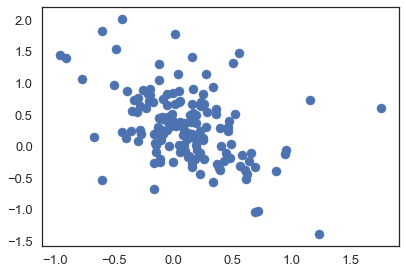

In [226]:
plt.scatter(b1ls,b0ls)

- those that start positive, have a negative slope. 
- those taht start averse, have a postive slope. 

### Split Model -  Mixed Effects and T-tests on Model Params

In [65]:
# # B0 gain v loss
# x1= df.loc[df['parameter']=='intecept_amb_gain','beta'].as_matrix()
# x2=df.loc[df['parameter']=='intecept_amb_loss','beta'].as_matrix()


# print('gain loss')
# print(scipy.stats.ttest_1samp(x1-x2,0))
# #print(scipy.stats.ttest_ind(x1,x2))

# # B1 gain v loss
# x1= df.loc[df['parameter']=='sqrt_prop_revealed_gain','beta'].as_matrix()
# x2=df.loc[df['parameter']=='sqrt_prop_revealed_loss','beta'].as_matrix()


# print(scipy.stats.ttest_1samp(x1-x2,0))





In [64]:
# import statsmodels.api as sm

# param = 'mag'
# #param = 'prob'

# # mag use or prob use #
# xg_amb = df.loc[df['parameter']==param+'_diff_amb_gain','beta'].as_matrix()
# xl_amb = df.loc[df['parameter']==param+'_diff_amb_loss','beta'].as_matrix()

# gain_loss = np.ones(len(xg_amb))
# gain_loss = np.append(gain_loss,np.zeros(len(xl_amb)))
# amb_unamb = np.ones(len(xg_amb)+len(xl_amb))

# xg_unamb = df.loc[df['parameter']==param+'_diff_rl_gain','beta'].as_matrix()

# xl_unamb = df.loc[df['parameter']==param+'_diff_rl_loss','beta'].as_matrix()
# gain_loss = np.append(gain_loss,np.ones(len(xg_amb)))
# gain_loss = np.append(gain_loss,np.zeros(len(xl_amb)))
# amb_unamb = np.append(amb_unamb,np.zeros(len(xg_amb)+len(xl_amb)))

# x1 = np.hstack((xg_amb,xl_amb,xg_unamb,xl_unamb))
# X = np.vstack((x1,gain_loss,amb_unamb)).T
# yX = pd.DataFrame(data=X,columns=['y','gain_loss','amb_unamb'])
# yX.head()
# y= yX.iloc[:,0]
# X = yX.iloc[:,1::]
# X = sm.add_constant(X)
# X['inter']=X['gain_loss']*X['amb_unamb']
# results = sm.OLS(y,X).fit()
# #results = sm.stats.anova_lm(results)
# results.summary()

In [359]:
#sm.stats.anova_lm(results)

In [445]:
#X['inter'].as_matrix()
#X['amb_unamb'].as_matrix()

In [446]:

#y,X = dmatrices('aic ~ model',data=df2,return_type='dataframe')
#y,X = dmatrices('aic ~ model*STAI_Trait',data=df,return_type='dataframe')
#model = sm.MixedLM(y,X,df2['MID'])

### Anova and T-tests on Model Params

In [66]:
# import scipy.stats
# x= df.loc[df['parameter']=='sqrt_prop_revealed_diff_rl_loss','beta'].as_matrix()
# print(scipy.stats.ttest_1samp(x,0))

# x= df.loc[df['parameter']=='sqrt_prop_revealed_diff_rl_gain','beta'].as_matrix()
# print(scipy.stats.ttest_1samp(x,0))






In [67]:
# x1= df.loc[df['parameter']=='mag_diff_rl_gain','beta'].as_matrix()
# x2=df.loc[df['parameter']=='mag_diff_rl_loss','beta'].as_matrix()
# print(scipy.stats.ttest_1samp(x1-x2,0))

# x3= df.loc[df['parameter']=='prob_diff_rl_gain','beta'].as_matrix()
# x4=df.loc[df['parameter']=='prob_diff_rl_loss','beta'].as_matrix()
# print(scipy.stats.ttest_1samp(x3-x4,0))





In [68]:


# x1= df.loc[df['parameter']=='ambig_present_diff_rl_gain','beta'].as_matrix()

# x2= df.loc[df['parameter']=='ambig_present_diff_rl_loss','beta'].as_matrix()
# print(scipy.stats.ttest_1samp(x1-x2,0))

In [69]:

# x2= df.loc[df['parameter']=='ambig_present_diff_rl_loss','beta'].as_matrix()
# x2
# df['parameter'].unique()
# #print(scipy.stats.ttest_1samp(x2,0))

### Scatters with STAI 

In [245]:
params = list(df.parameter.unique())
len(params)

14

In [246]:
params.remove('intercept_unambig_loss')
params.remove('intercept_unambig_gain')


In [247]:
params

['intercept_ambig_gain',
 'intercept_ambig_loss',
 'mag_diff_amb_gain',
 'mag_diff_amb_loss',
 'mag_diff_rl_gain',
 'mag_diff_rl_loss',
 'prob_diff_amb_gain',
 'prob_diff_amb_loss',
 'prob_diff_rl_gain',
 'prob_diff_rl_loss',
 'sqrt_prop_revealed_gain',
 'sqrt_prop_revealed_loss']

In [ ]:
paramnames={}
paramnames['intercept_ambig_gain']


In [256]:
names = [['mag_diff_amb_loss','mag_diff_amb_gain','mag_diff_rl_loss','mag_diff_rl_gain'],
        ['prob_diff_amb_loss','prob_diff_amb_gain','prob_diff_rl_loss','prob_diff_rl_gain'],
        ['intercept_ambig_gain','intercept_ambig_loss'],
        ['sqrt_prop_revealed_gain','sqrt_prop_revealed_loss']
        ]

In [558]:
def plot_scatters(df,param,i,color,alpha=0.7,title=''):
    for t,trait in enumerate(['STAI_Trait']):
        dft = df.loc[df['parameter']==param,]
        x = dft[trait].as_matrix()
        y = dft['beta'].as_matrix()
        nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
        x=x[nans]
        y=y[nans]
        # eliminate based on std
        x = x[(y<(y.mean()+y.std()*3.0)) & (y>(y.mean()+y.std()*-3.0))]
        y = y[(y<(y.mean()+y.std()*3.0)) & (y>(y.mean()+y.std()*-3.0))]
        x = x[(y<10)]
        y = y[(y<10)]

        (r,p) =scipy.stats.spearmanr(x,y)
        r = np.round(r,2)
        p = np.round(p,2)
        axes[i].scatter(x,y,alpha=alpha,color=color)

        X = sm.add_constant(x, prepend=False)
        res_ols = sm.OLS(y, X).fit()
        p_ols=res_ols.pvalues[0]
        b_ols=res_ols.params[0]
        intercept = res_ols.params[1]
        axes[i].plot(X[:,0],b_ols*X[:,0]+intercept,color=color,alpha=alpha)

        paramn = param #paramnames[param]
        existing_title = axes[i].title.get_text()
        if existing_title!='': 
            existing_title=existing_title+'; '
        else:
            existing_title=title
        axes[i].set_title(str(existing_title)+'r='+str(r)+' p='+str(p))
        axes[i].set_xlabel('Trait Anxiety')
        axes[i].set_ylabel('Regression Coefficient')
        sns.despine()
        print(param)

In [539]:

# # mags 
# fig,axes = plt.subplots(2,2,figsize=(6,6))
# axes = axes.flatten()
# i=0
# for param in names[0]:
#     plot_scatters(df,param,i)
#     i+=1
# plt.suptitle('Magnitude Difference')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('../figs/SfN_Poster//scatter_stai_mag.png',dpi=300,bbox_inches='tight')

In [538]:

# # mags 
# fig,axes = plt.subplots(2,2,figsize=(6,6))
# axes = axes.flatten()
# i=0
# for param in names[1]:
#     plot_scatters(df,param,i)
#     i+=1
# plt.suptitle('Probability Difference')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('../figs/SfN_Poster/scatter_stai_prob.png',dpi=300,bbox_inches='tight')

In [540]:

# # mags 
# fig,axes = plt.subplots(1,2,figsize=(6,3))
# axes = axes.flatten()
# i=0
# for param in names[2]:
#     plot_scatters(df,param,i)
#     i+=1
# plt.suptitle('Ambiguity Presence')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('../figs/SfN_Poster/scatter_stai_amb.png',dpi=300,bbox_inches='tight')

sqrt_prop_revealed_gain
sqrt_prop_revealed_loss


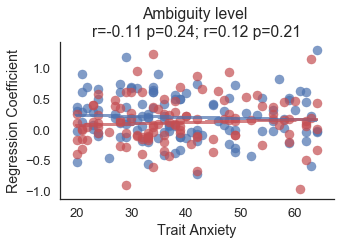

In [560]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in names[3]:
    plot_scatters(df,param,0,current_palette[colors[i]],title='Ambiguity level \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_amb_level.png',dpi=300,bbox_inches='tight')

intercept_ambig_gain
intercept_ambig_loss


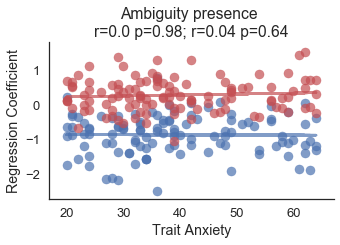

In [561]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in names[2]:
    plot_scatters(df,param,0,current_palette[colors[i]],title='Ambiguity presence \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_amb.png',dpi=300,bbox_inches='tight')

In [562]:
names[1]

['prob_diff_amb_loss',
 'prob_diff_amb_gain',
 'prob_diff_rl_loss',
 'prob_diff_rl_gain']

prob_diff_amb_loss
prob_diff_amb_gain


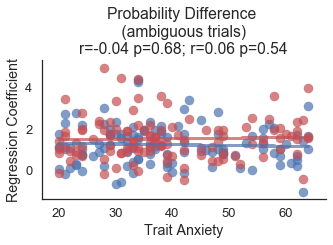

In [564]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in ['prob_diff_amb_loss','prob_diff_amb_gain']:
    plot_scatters(df_for_plot,param,0,current_palette[colors[i]],title='Probability Difference \n (ambiguous trials) \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_prob_amb.png',dpi=300,bbox_inches='tight')

prob_diff_rl_loss
prob_diff_rl_gain


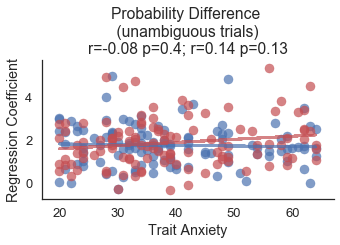

In [565]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in ['prob_diff_rl_loss','prob_diff_rl_gain']:
    plot_scatters(df_for_plot,param,0,current_palette[colors[i]],title='Probability Difference \n (unambiguous trials) \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_prob_unamb.png',dpi=300,bbox_inches='tight')

mag_diff_rl_loss
mag_diff_rl_gain


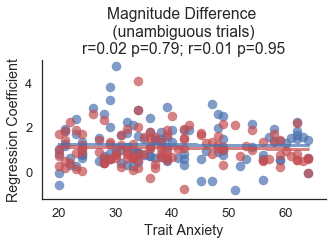

In [566]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in ['mag_diff_rl_loss','mag_diff_rl_gain']:
    plot_scatters(df_for_plot,param,0,current_palette[colors[i]],title='Magnitude Difference \n (unambiguous trials) \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_mag_unamb.png',dpi=300,bbox_inches='tight')

In [568]:
names[0]

['mag_diff_amb_loss',
 'mag_diff_amb_gain',
 'mag_diff_rl_loss',
 'mag_diff_rl_gain']

mag_diff_amb_loss
mag_diff_amb_gain


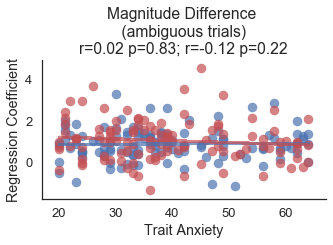

In [569]:

# ambiguity level 
fig,axes = plt.subplots(1,1,figsize=(5,4))
#axes = axes.flatten()
axes=[axes]
i=0
colors=[0,2]
for param in ['mag_diff_amb_loss','mag_diff_amb_gain']:
    plot_scatters(df_for_plot,param,0,current_palette[colors[i]],title='Magnitude Difference \n (ambiguous trials) \n')
    i+=1
#plt.suptitle('Ambiguity level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figs/SfN_Poster/scatter_stai_mag_amb.png',dpi=300,bbox_inches='tight')

### Scatters with traits 

In [83]:
import scipy.stats


In [84]:
def scatter(param,df,trait):
    matplotlib.rc("font", family="Times New Roman")
    sns.set_context('talk')
    sns.set_style('white',{'figure.facecolor':'white'})
    dft = df.loc[df['parameter']==param,]
    ax = sns.lmplot(x=trait,y='beta',data=dft)
    x = dft[trait].as_matrix()
    y = dft['beta'].as_matrix()
    nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
    x=x[nans]
    y=y[nans]
    print(scipy.stats.pearsonr(x,y))
    plt.title(param)

153


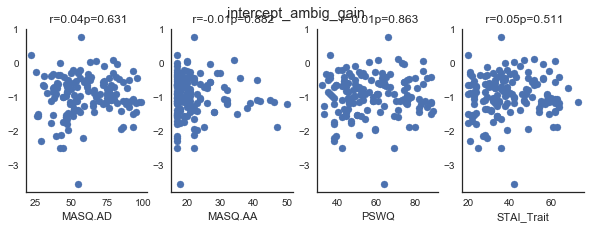

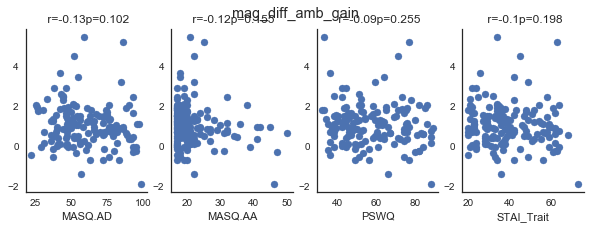

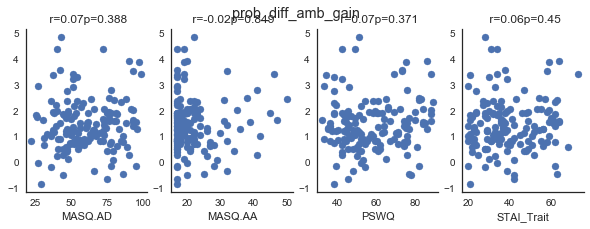

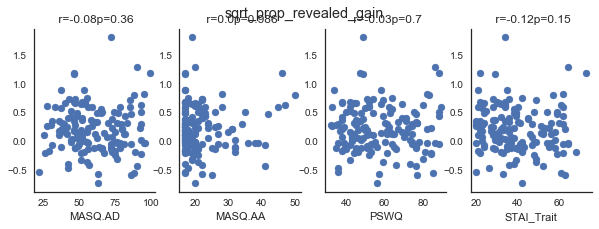

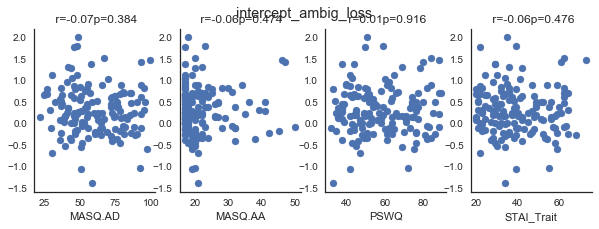

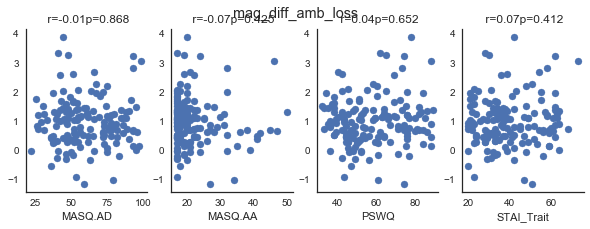

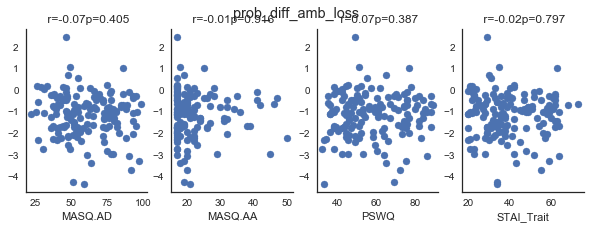

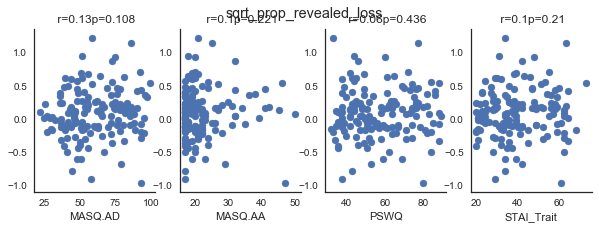

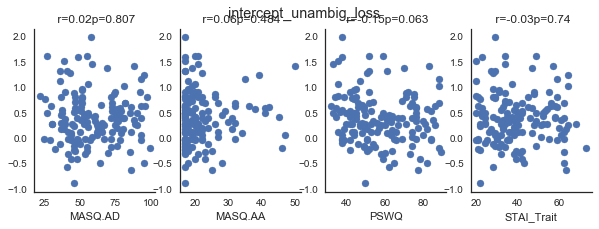

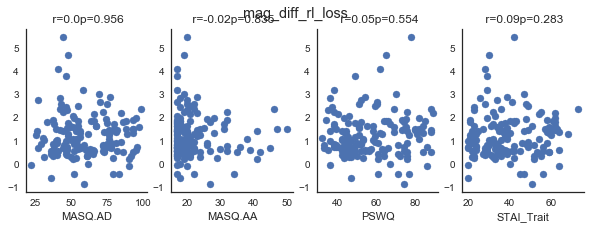

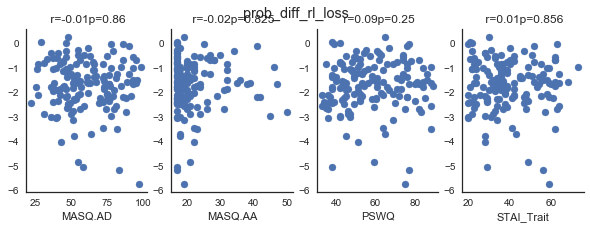

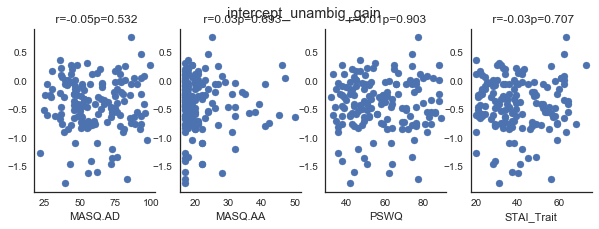

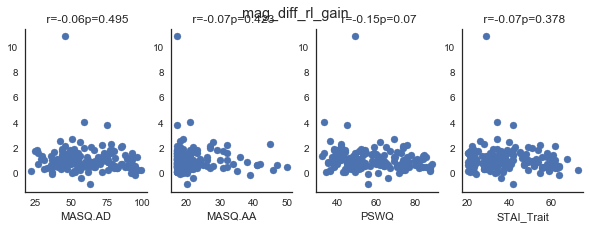

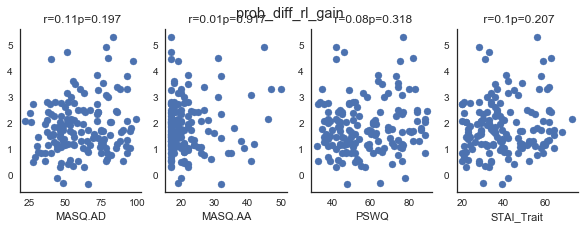

In [102]:
params = df.parameter.unique()
print(len(df.MID.unique()))
param = params[0]
for param in params:
    fig,axes = plt.subplots(1,4,figsize=(10,3))
    for t,trait in enumerate(['MASQ.AD','MASQ.AA','PSWQ','STAI_Trait']):
    #for t,trait in enumerate(['FA1','FA2','FA3']):
        dft = df.loc[df['parameter']==param,]
        x = dft[trait].as_matrix()
        y = dft['beta'].as_matrix()
        nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
        x=x[nans]
        y=y[nans]
        
        # eliminate based on std
        x = x[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]
        y = y[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]

        
        (r,p) =scipy.stats.spearmanr(x,y)
        r = np.round(r,2)
        p = np.round(p,3)
        axes[t].scatter(x,y)
        axes[t].set_title(' r='+str(r)+'p='+str(p))
        axes[t].set_xlabel(trait)
    
        plt.suptitle(param)
        sns.despine()
        #plt.savefig('../figs/scatter_traits_log_reg_combined/'+param+'.png',dpi=300)
        #plt.close()
        #print(param)

### Scatter with Traits (one line)

In [96]:
df.parameter.unique()

array(['intercept_ambig_gain', 'mag_diff_amb_gain', 'prob_diff_amb_gain',
       'sqrt_prop_revealed_gain', 'intercept_ambig_loss',
       'mag_diff_amb_loss', 'prob_diff_amb_loss',
       'sqrt_prop_revealed_loss', 'intercept_unambig_loss',
       'mag_diff_rl_loss', 'prob_diff_rl_loss', 'intercept_unambig_gain',
       'mag_diff_rl_gain', 'prob_diff_rl_gain'], dtype=object)

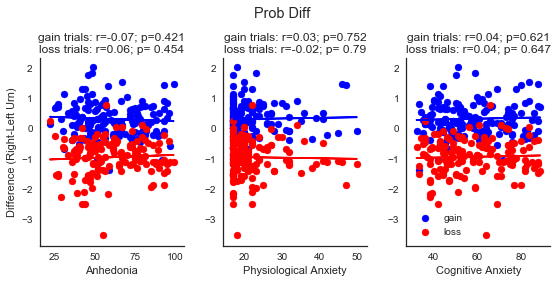

In [101]:
from sklearn import preprocessing
param1='mag_diff_rl_gain'
param2='mag_diff_rl_loss'
suptitle = 'Prob Diff'

param1 = 'mag_diff_amb_loss'
param2 = 'mag_diff_amb_gain'

param1 = 'intercept_ambig_loss'
param2 = 'intercept_ambig_gain'

sns.set_context('notebook')
fig,axes = plt.subplots(1,3,figsize=(8,4))

for t,trait in enumerate(['MASQ.AD','MASQ.AA','PSWQ']):

    dft = df.loc[df['parameter']==param1,]
    x = dft[trait].as_matrix()
    y = dft['beta'].as_matrix()
    nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
    x=x[nans]
    y=y[nans]
    
    # eliminate based on std
    x = x[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]
    y = y[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]

    
    (r1,p1) =scipy.stats.pearsonr(x,y)
    r1 = np.round(r1,2)
    p1 = np.round(p1,3)
    axes[t].scatter(x,y,color='b',label='gain')
    X = sm.add_constant(x, prepend=False)
    res_ols = sm.OLS(y, X).fit()
    p_ols=res_ols.pvalues[0]
    b_ols=res_ols.params[0]
    intercept = res_ols.params[1]
    axes[t].plot(X[:,0],b_ols*X[:,0]+intercept,color='b')

    
    dft = df.loc[df['parameter']==param2,]
    x = dft[trait].as_matrix()
    y = dft['beta'].as_matrix()
    nans = np.logical_and(~np.isnan(x), ~np.isnan(y))
    x=x[nans]
    y=y[nans]
    
    # eliminate based on std
    x = x[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]
    y = y[(y<(y.mean()+y.std()*4.0)) & (y>(y.mean()+y.std()*-4.0))]

    
    (r2,p2) =scipy.stats.pearsonr(x,y)
    r2 = np.round(r2,2)
    p2 = np.round(p2,3)

    axes[t].scatter(x,y,color='r',label='loss')
    X = sm.add_constant(x, prepend=False)
    res_ols = sm.OLS(y, X).fit()
    p_ols=res_ols.pvalues[0]
    b_ols=res_ols.params[0]
    intercept = res_ols.params[1]
    axes[t].plot(X[:,0],b_ols*X[:,0]+intercept,color='r')
    
    axes[t].set_title('gain trials: r='+str(r1)+'; p='+str(p1)+'\n'+'loss trials: r='+str(r2)+'; p= '+str(p2))
    axes[t].set_xlabel(trait)
    if t==2:
        plt.legend()

axes[0].set_ylabel('Difference (Right-Left Urn)')
axes[0].set_xlabel('Anhedonia')
axes[1].set_xlabel('Physiological Anxiety')
axes[2].set_xlabel('Cognitive Anxiety')
plt.suptitle(suptitle)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
sns.despine()
#plt.savefig('../figs/'+datasetfolder+'/scatter'+suptitle+'.png',dpi=300)